# Using polar orbiting passive microwave satellites for evaluating ECMWF IFS
Here we make use of PAMTRA to accomplish the model-to-obs approach for ECMWF IFS that enables us to use passive microwave instruments on polar orbiting satellites to evluate the model. The example is threefold. First we show how to simulate the brightness temperatures without taking care of any resolution differences between model and observation. In the second step we apply tools that convolute the simulated fields with the satellite field of views. In a last step the data is plotted.

The example requires some input data in the data folder that can be downloaded from University of Cologne:

  * [ECMWF data](https://uni-koeln.sciebo.de/s/b7mQApr4R9vRMgj)
  * [landseamask](https://uni-koeln.sciebo.de/s/pMgQrOxQDkI1MrT)
  * [ECMWF constant file](https://uni-koeln.sciebo.de/s/1WXcic3YeWJG43V)
  * Satellite observations[1](https://uni-koeln.sciebo.de/s/oU83fOsgvqAORox),[2](https://uni-koeln.sciebo.de/s/ANEw3yt7LfnhASG)

Furthermore, tools or helper modules are required that will be loaded from a separate directory.

The complete simulations take quite some time. On a normal desktop PC it might take much more than one hour.

Start by importing all we need to run PAMTRA.

In [1]:
import numpy as np
import pyPamtra
import pandas as pd

Define a descriptor file for four hydrometeors.

In [2]:
descriptorFile = np.array([
        #['hydro_name' 'as_ratio' 'liq_ice' 'rho_ms' 'a_ms' 'b_ms' 'alpha_as' 'beta_as' 'moment_in' 'nbin' 'dist_name' 'p_1' 'p_2' 'p_3' 'p_4' 'd_1' 'd_2' 'scat_name' 'vel_size_mod' 'canting']
        ('cwc_q', -99.0,  1, -99.0,   -99.0, -99.0,  -99.0, -99.0, 3, 1, 'mono', -99.0, -99.0,   2.0,    1.0,   2.0e-6,   8.0e-5, 'mie-sphere', 'khvorostyanov01_drops', -99.0),
        ('iwc_q', 1.0, -1, 700.0, -99.0,  -99.0,  -99.0,   -99.0, 3, 1, 'mono', -99.0, -99.0, 1.564, 0.8547, 1.744e-5, 9.369e-3, 'mie-sphere',   'heymsfield10_particles',  -99.0),
        ('rwc_q', -99.0,  1, -99.0,   -99.0, -99.0,  -99.0, -99.0, 3, 50, 'exp', 0.22, 2.2,   -99.0,    -99.0,  0.000012,   0.006, 'mie-sphere', 'khvorostyanov01_drops',  -99.0),
        ('swc_q', 1.0, -1, -99.0,   0.069,   2.0, 0.3971,  1.88, 3, 50, 'exp', 2.e06, 0.,  -99.0,  -99.0,  2.e-04,  0.005, 'mie-sphere',   'heymsfield10_particles',  -99.0)],
        dtype=[('hydro_name', 'S15'), ('as_ratio', '<f8'), ('liq_ice', '<i8'), ('rho_ms', '<f8'), ('a_ms', '<f8'), ('b_ms', '<f8'), ('alpha_as', '<f8'), ('beta_as', '<f8'), ('moment_in', '<i8'), ('nbin', '<i8'), ('dist_name', 'S15'), ('p_1', '<f8'), ('p_2', '<f8'), ('p_3', '<f8'), ('p_4', '<f8'), ('d_1', '<f8'), ('d_2', '<f8'), ('scat_name', 'S20'), ('vel_size_mod', 'S30'), ('canting', '<f8')] 
        )
DF = pd.DataFrame(descriptorFile)
DF

,hydro_name,as_ratio,liq_ice,rho_ms,a_ms,b_ms,alpha_as,beta_as,moment_in,nbin,dist_name,p_1,p_2,p_3,p_4,d_1,d_2,scat_name,vel_size_mod,canting
0,cwc_q,-99.0,1,-99.0,-99.000,-99.0,-99.0000,-99.00,3,1,mono,-99.00,-99.0,2.000,1.0000,0.000002,0.000080,mie-sphere,khvorostyanov01_drops,-99.0
1,iwc_q,1.0,-1,700.0,-99.000,-99.0,-99.0000,-99.00,3,1,mono,-99.00,-99.0,1.564,0.8547,0.000017,0.009369,mie-sphere,heymsfield10_particles,-99.0
2,rwc_q,-99.0,1,-99.0,-99.000,-99.0,-99.0000,-99.00,3,50,exp,0.22,2.2,-99.000,-99.0000,0.000012,0.006000,mie-sphere,khvorostyanov01_drops,-99.0
3,swc_q,1.0,-1,-99.0,0.069,2.0,0.3971,1.88,3,50,exp,2000000.00,0.0,-99.000,-99.0000,0.000200,0.005000,mie-sphere,heymsfield10_particles,-99.0


Define a subgrid that is gonna be read from the complete model field (401,401) and import the data by using the pyPamtra importer readECMWF. The parameters are as follows: model data, constant file, descriptor array, landseamask file, and grid information.

In [3]:
grid = [75,225,100,200]
pam = pyPamtra.importer.readECMWF('data/P20160926_19','data/nawdex_cst',descriptorFile,'data/landseamask',grid=grid)

opening 1 of 1 data/P20160926_19
opening 1 of 1 data/nawdex_cst
opening 1 of 1 data/landseamask


/home/mech/lib/python/pyPamtra/core.py:823: Warning: timestamp set to now
  warnings.warn("timestamp set to now", Warning)
/home/mech/lib/python/pyPamtra/core.py:840: Warning: lat set to 50.938056
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:840: Warning: lon set to 6.956944
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:840: Warning: sfc_salinity set to 33.0
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:840: Warning: sfc_slf set to 1.0
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:840: Warning: sfc_sif set to 0.0
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:873: Warning: obs_height set to [833000.0, 0.0]
  warnings.warn("%s set to %s"%(environment,preset,), Warning)
/home/mech/lib/python/pyPamtra/core.py:883:

The model data do not include latitude and longitude grids. For PAMTRA these are only needed if the grid point is over land or sea ice. In these cases the TELSEM2 emissivity maps are used to provide a surface emissivity. The land/ocean/ice information is taken from separate variables like landseafraction. The importer sets the parameters for the pamtra run according to the information provided by the ECMWF output. These are

  * pam.p['sfc_type'] # surface type
    * 0: ocean
    * 1: land
  * pam.p['sfc_model'] # surface model
    * 0: TESSEM2/TELSEM2
    * 1: FASTEM/SSMI
  * pam.p['sfc_refl'] # reflection type
    * 'F': Fresnel
    * 'S': specular
    * 'L': Lambertian

The example shown here is only over ocean. Therefore, the surface emissivity is calculated with TESSEM<sup>2</sup>. Nevertheless, latitude and longitude grids are needed for the convolution with the satellite swaths and field of views in the latter steps and to plot the data on a map. 

In [4]:
# create latitude and longitude grid
latrange = np.arange(40.,80.01,0.1)
lonrange = np.arange(-50.,-9.91,0.1)

lats = np.zeros((1,grid[3]-grid[2]))
lats[0,:] = latrange[grid[2]:grid[3]]
pam.p['lat'][:,:] = np.repeat(lats,grid[1]-grid[0],axis=0)

lons = np.zeros((grid[1]-grid[0],1))
lons[:,0] = lonrange[grid[0]:grid[1]]
pam.p['lon'][:,:] = np.repeat(lons,grid[3]-grid[2],axis=1)

Switch of active simulation. All other settings which can be inspected by printing *pam.nmlSet* are left with their default.

In [5]:
pam.nmlSet['active'] = False # Active not needed

Provide frequency grid. 50.3 as AMSU-A and 89.0 and 157.0 as MHS frequencies.

In [6]:
freqs = [50.3,89.0,157.0]

### Run PAMTRA with Mie
Run PAMTRA in parallel mode for 10x10 chunks. Depending on your hardware, this may take some time. 

In [7]:
pam.runParallelPamtra(freqs,pp_deltaX=10,pp_deltaY=10,pp_deltaF=1,pp_local_workers='auto')

Write results to file for later use.

In [8]:
pam.writeResultsToNetCDF('data/ecmwf_mie.nc')

Now, after doing the simulations with Mie scattering method for cloud ice and snow, change to Self-similar Rayleigh-Gans approximation and provide an aspect ratio for snow. This can be done by directly modifying the data fields of the descriptorfile object *pam.df*.

In [9]:
pam.df.data[1][17] = 'ssrg-rt3' # scattering method for cloud ice
pam.df.data[3][17] = 'ssrg-rt3' # scattering method for snow
pam.df.data[3][1] = 0.6 # aspect ratio of snow

### Run PAMTRA with SSRGA
Run PAMTRA again in parallel mode for 10x10 chunks. Depending on your hardware, this may take some time.

In [10]:
pam.runParallelPamtra(freqs,pp_deltaX=10,pp_deltaY=10,pp_deltaF=1,pp_local_workers='auto')

Write results to file for later use.

In [11]:
pam.writeResultsToNetCDF('data/ecmwf_ssrga.nc')

The figure in the paper is produced by applying a convolution of the simulated fields with the satellite instruments swath and field of view. For this tools have to be used, that have nothing to do with PAMTRA itself. A description of the algorithm can be found in M. Mech 2008: Potential of millimeter- and submillimeter-wave satellite observations for hydrometeor studies DOI: https://doi.org/10.23689/fidgeo-278. Nevertheless, for interested users the required modules are included in the *examples/tools* directory. To perform the convolution *model2sat.py* (interface to call the convolution and its submodules), *satConv.py* (the convolution), and *swath.py* (reading satellite data) are needed. 

In [12]:
%matplotlib inline

opening 1 of 1 data/ecmwf_ssrga.nc
opening 1 of 1 data/ecmwf_mie.nc
opening 1 of 1 data/ecmwf_ssrga.nc
opening 1 of 1 data/ecmwf_mie.nc
opening 1 of 1 data/ecmwf_ssrga.nc
opening 1 of 1 data/ecmwf_mie.nc


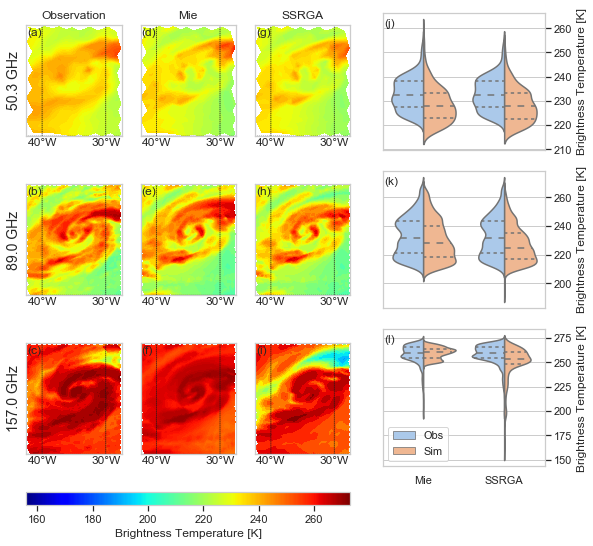

In [25]:
import sys
sys.path.append('tools/')
execfile('tools/model2sat.py')